# Basic EDA for German Credit Dataset
This notebook helped us visualize the dataset before cleaning. Additionally, it generates Plot 1 (Target Distribution) and explores data quality.

The plot 1 graph generated is also saved in reports/figures/ as Plot_1-Target_Distribution.png

## Setup and Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import data loading function
from ucimlrepo import fetch_ucirepo

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load Data

In [57]:
print("\n[1] Loading data from UCI ML Repository...")
statlog_german_credit_data = fetch_ucirepo(id=144)

# Extract features and target
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combine for easier EDA
df = pd.concat([X, y], axis=1)

print(f"Data loaded successfully")


[1] Loading data from UCI ML Repository...
Data loaded successfully


## 2. Dataset Overview

In [58]:
print(f"\nDataset shape: {df.shape}")
print(f"  - Rows (samples): {df.shape[0]}")
print(f"  - Columns (features + target): {df.shape[1]}")


Dataset shape: (1000, 21)
  - Rows (samples): 1000
  - Columns (features + target): 21


In [59]:
print("Data types:")
print(df.dtypes.value_counts())

Data types:
object    13
int64      8
Name: count, dtype: int64


In [60]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1

## 3. Missing Values Check

In [61]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\n⚠ Columns with missing values:")
    print(missing_df)
else:
    print("\nNo missing values found in any column!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


No missing values found in any column!

Total missing values: 0


## 4. Descriptive Statistics (Numerical Features)

In [62]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns: {len(numerical_cols)}")
print(numerical_cols)


Numerical columns: 8
['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18', 'class']


In [63]:
print("\n" + "-"*70)
df[numerical_cols].describe()


----------------------------------------------------------------------


,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## 5. Target Distribution - PLOT 1 FOR REPORT

In [64]:
# Check target column
target_col = 'class'  # Based on UCI dataset
print(f"\nTarget column: '{target_col}'")
print(f"Target values:\n{df[target_col].value_counts().sort_index()}")

# Map target for better labels: 1=Good, 2=Bad
target_counts = df[target_col].value_counts().sort_index()
print(f"\nClass distribution:")
print(f"  Class 1 (Good Credit): {target_counts.get(1, 0)} samples ({target_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"  Class 2 (Bad Credit):  {target_counts.get(2, 0)} samples ({target_counts.get(2, 0)/len(df)*100:.1f}%)")


Target column: 'class'
Target values:
class
1    700
2    300
Name: count, dtype: int64

Class distribution:
  Class 1 (Good Credit): 700 samples (70.0%)
  Class 2 (Bad Credit):  300 samples (30.0%)



Plot 1 (Target Distribution) displayed below


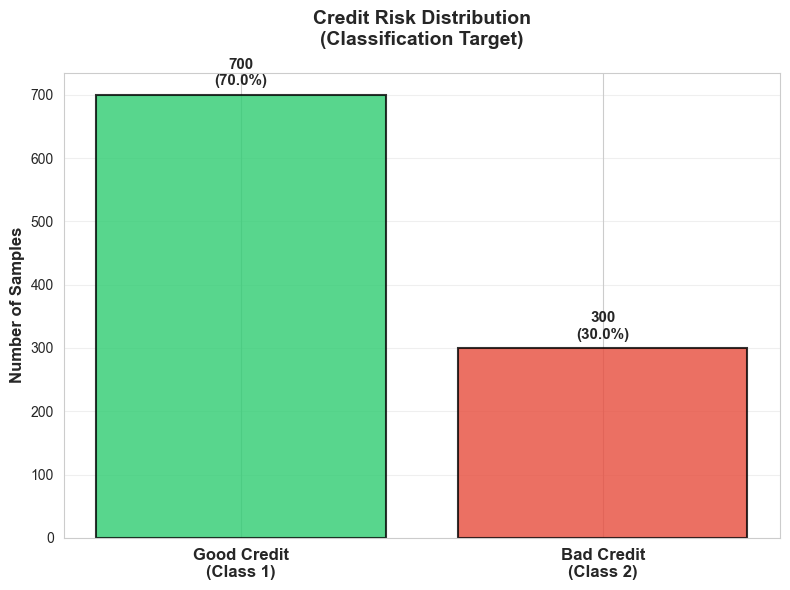

In [65]:
# Create Plot 1: Target Distribution
fig, ax = plt.subplots(figsize=(8, 6))

# Count plot with custom colors
labels = ['Good Credit\n(Class 1)', 'Bad Credit\n(Class 2)']
counts = [target_counts.get(1, 0), target_counts.get(2, 0)]
colors = ['#2ecc71', '#e74c3c']  # Green for good, red for bad

bars = ax.bar(range(len(counts)), counts, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Customize plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Credit Risk Distribution\n(Classification Target)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{count}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
print(f"\nPlot 1 (Target Distribution) displayed below")
plt.show()

## 6. Numerical Feature Distributions


Generating histograms for 8 numerical features...
Numerical feature distributions displayed below


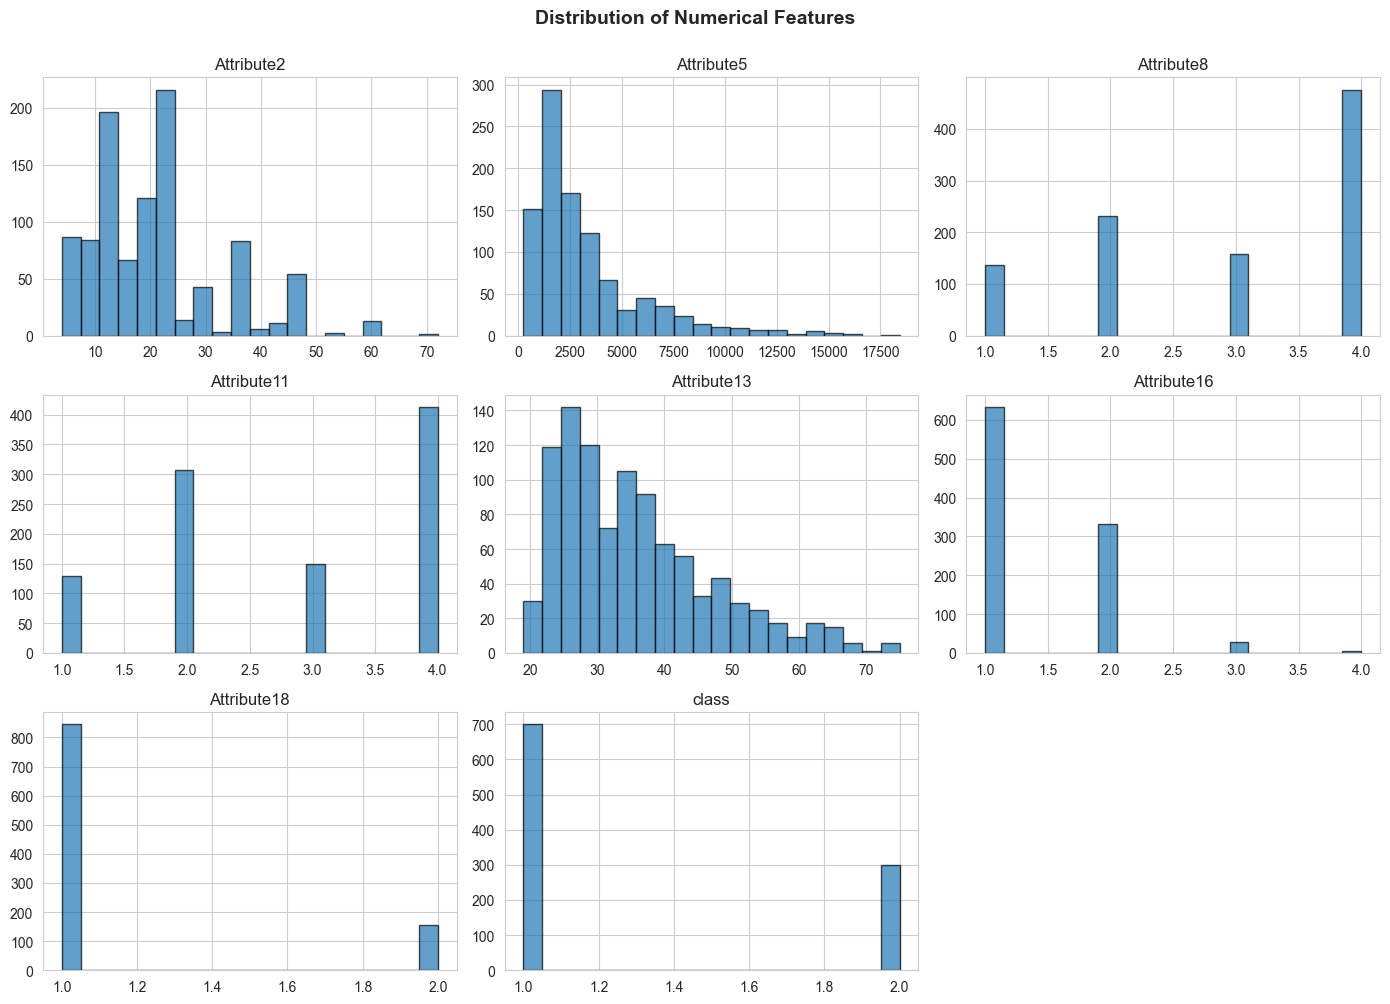

In [66]:
print(f"\nGenerating histograms for {len(numerical_cols)} numerical features...")

fig = df[numerical_cols].hist(figsize=(14, 10), bins=20, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
print(f"Numerical feature distributions displayed below")
plt.show()

## Summary

In [67]:
print(f"""
Dataset: German Credit (UCI ML Repository)
Samples: {df.shape[0]}
Features: {df.shape[1] - 1} (+ 1 target)
  - Numerical: {len(numerical_cols)}
  - Categorical: {len(categorical_cols)}

Missing Values: {df.isnull().sum().sum()}
Duplicates: {df.duplicated().sum()}

Target Distribution:
  - Good Credit (1): {target_counts.get(1, 0)} ({target_counts.get(1, 0)/len(df)*100:.1f}%)
  - Bad Credit (2):  {target_counts.get(2, 0)} ({target_counts.get(2, 0)/len(df)*100:.1f}%)
  - Class Imbalance Ratio: {target_counts.get(1, 0) / target_counts.get(2, 0):.2f}:1
""")


Dataset: German Credit (UCI ML Repository)
Samples: 1000
Features: 20 (+ 1 target)
  - Numerical: 8
  - Categorical: 13

Missing Values: 0
Duplicates: 0

Target Distribution:
  - Good Credit (1): 700 (70.0%)
  - Bad Credit (2):  300 (30.0%)
  - Class Imbalance Ratio: 2.33:1

